                     junction  vehicles           id      time
datetime                                                      
2015-11-01 00:00:00         1        15  20151101001  00:00:00
2015-11-01 01:00:00         1        13  20151101011  01:00:00
2015-11-01 02:00:00         1        10  20151101021  02:00:00
2015-11-01 03:00:00         1         7  20151101031  03:00:00
2015-11-01 04:00:00         1         9  20151101041  04:00:00
...                       ...       ...          ...       ...
2017-06-30 19:00:00         4        11  20170630194  19:00:00
2017-06-30 20:00:00         4        30  20170630204  20:00:00
2017-06-30 21:00:00         4        16  20170630214  21:00:00
2017-06-30 22:00:00         4        22  20170630224  22:00:00
2017-06-30 23:00:00         4        12  20170630234  23:00:00

[48120 rows x 4 columns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
               '2015-11-01 02:00:00', '2

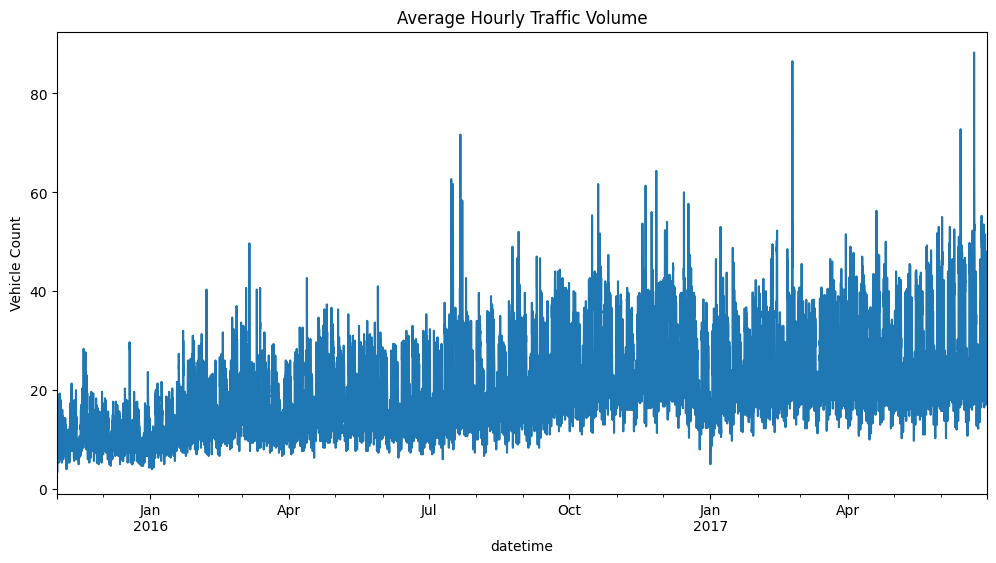

Mean Absolute Error: 14.16
Root Mean Squared Error: 16.03


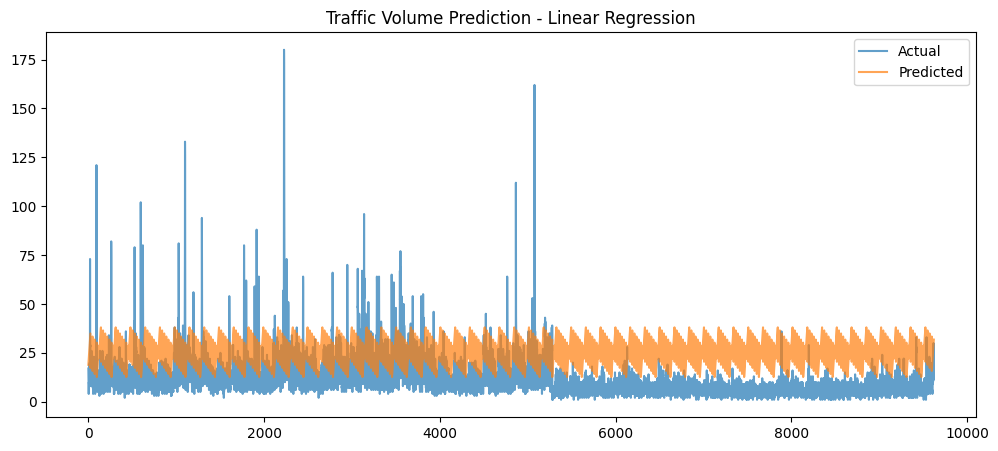

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = pd.read_csv('traffic.csv', encoding='utf-8-sig')

data.columns = [col.strip().lower() for col in data.columns]
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M', errors='coerce')
data.set_index('datetime', inplace=True)


print(data)

datetime_candidates = ['datetime', 'date_time', 'timestamp', 'date']

for candidate in datetime_candidates:
    if candidate in data.columns:
        data.set_index(candidate, inplace=True)
        print(f"Using '{candidate}' as the datetime index.")
        break
print(type(data.index))
print(data.index)

data['vehicles'].resample('H').mean().plot(figsize=(12,6))
plt.title('Average Hourly Traffic Volume')
plt.ylabel('Vehicle Count')
plt.show()

data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek

features = ['hour', 'day_of_week']  # can add weather, holiday flags etc.

X = data[features]
y = data['vehicles']

split_point = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")



plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Traffic Volume Prediction - Linear Regression")
plt.show()

                     junction  vehicles           id      time
datetime                                                      
2015-11-01 00:00:00         1        15  20151101001  00:00:00
2015-11-01 01:00:00         1        13  20151101011  01:00:00
2015-11-01 02:00:00         1        10  20151101021  02:00:00
2015-11-01 03:00:00         1         7  20151101031  03:00:00
2015-11-01 04:00:00         1         9  20151101041  04:00:00
...                       ...       ...          ...       ...
2017-06-30 19:00:00         4        11  20170630194  19:00:00
2017-06-30 20:00:00         4        30  20170630204  20:00:00
2017-06-30 21:00:00         4        16  20170630214  21:00:00
2017-06-30 22:00:00         4        22  20170630224  22:00:00
2017-06-30 23:00:00         4        12  20170630234  23:00:00

[48120 rows x 4 columns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
               '2015-11-01 02:00:00', '2

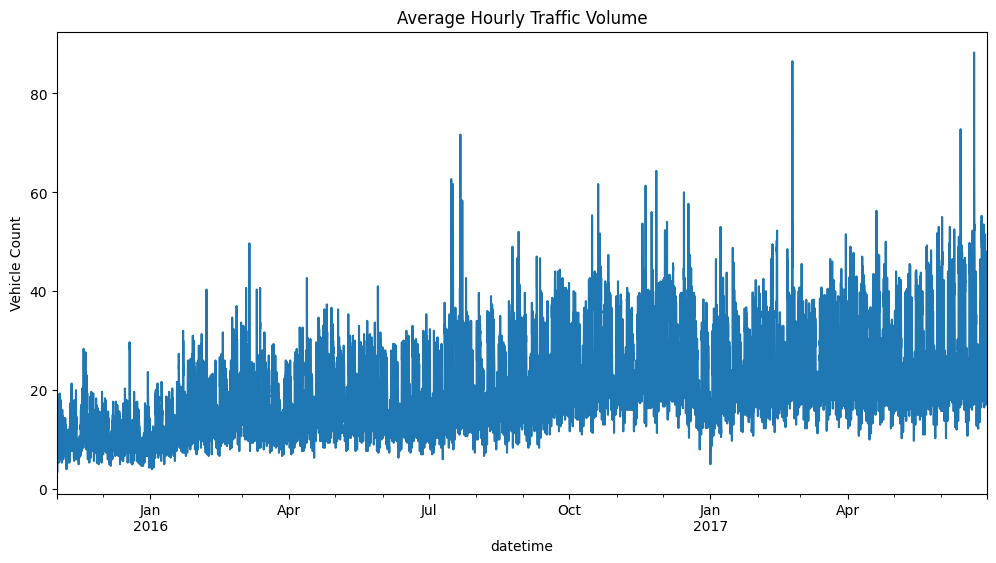

Mean Absolute Error: 5.58
Root Mean Squared Error: 9.41


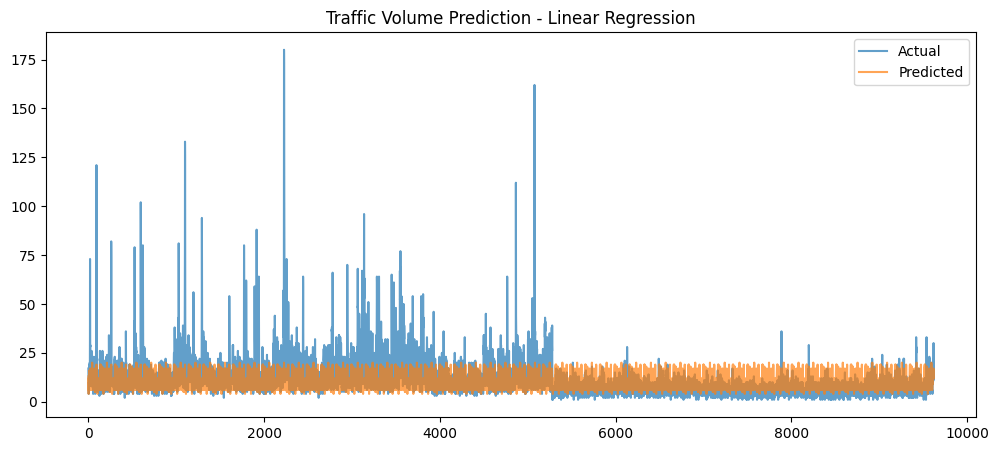

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = pd.read_csv('traffic.csv', encoding='utf-8-sig')

data.columns = [col.strip().lower() for col in data.columns]
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M', errors='coerce')
data.set_index('datetime', inplace=True)


print(data)

datetime_candidates = ['datetime', 'date_time', 'timestamp', 'date']

for candidate in datetime_candidates:
    if candidate in data.columns:
        data.set_index(candidate, inplace=True)
        print(f"Using '{candidate}' as the datetime index.")
        break
print(type(data.index))
print(data.index)

data['vehicles'].resample('H').mean().plot(figsize=(12,6))
plt.title('Average Hourly Traffic Volume')
plt.ylabel('Vehicle Count')
plt.show()

data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek

features = ['hour', 'day_of_week']  # can add weather, holiday flags etc.

X = data[features]
y = data['vehicles']

split_point = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")



plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Traffic Volume Prediction - Linear Regression")
plt.show()

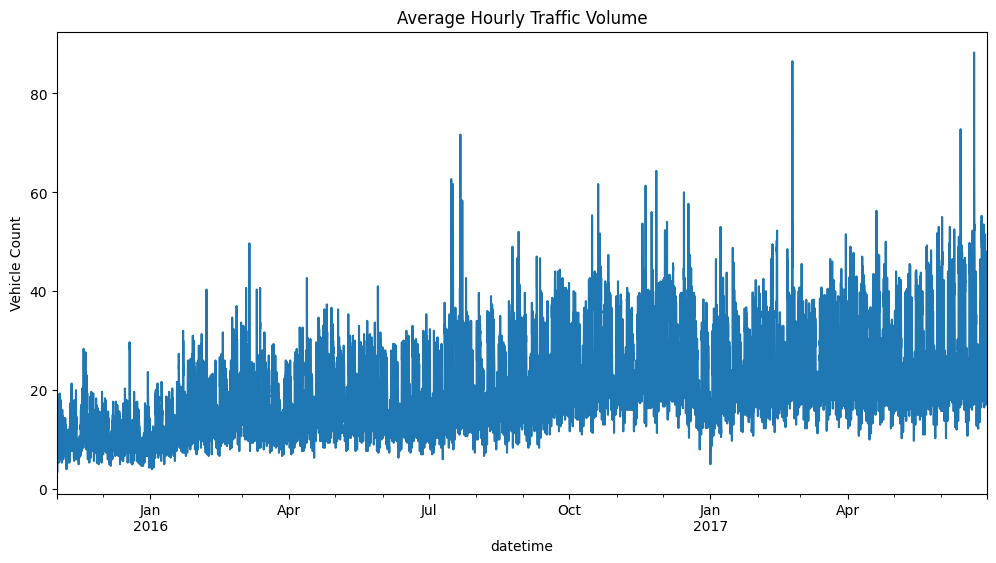

Mean Absolute Error: 3.39
Root Mean Squared Error: 5.72


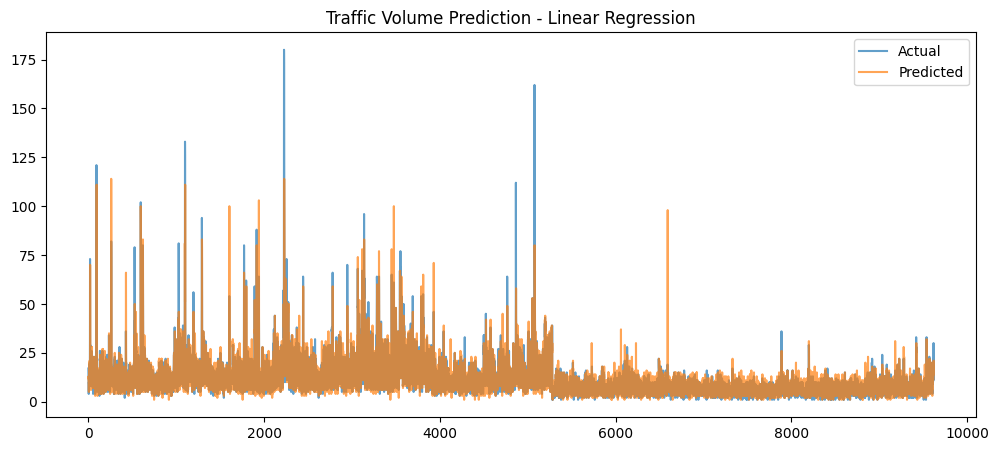

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = pd.read_csv('traffic.csv', encoding='utf-8-sig')

data.columns = [col.strip().lower() for col in data.columns]
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M', errors='coerce')
data.set_index('datetime', inplace=True)

datetime_candidates = ['datetime', 'date_time', 'timestamp', 'date']

for candidate in datetime_candidates:
    if candidate in data.columns:
        data.set_index(candidate, inplace=True)
        print(f"Using '{candidate}' as the datetime index.")
        break
data['vehicles'].resample('H').mean().plot(figsize=(12,6))
plt.title('Average Hourly Traffic Volume')
plt.ylabel('Vehicle Count')
plt.show()

data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek

features = ['hour', 'day_of_week','lag1','lag2']  # can add weather, holiday flags etc.

X = data[features]
y = data['vehicles']

split_point = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")



plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Traffic Volume Prediction - Linear Regression")
plt.show()

C:\Users\Omair\AppData\Local\Temp\ipykernel_29060\3345435675.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['vehicles'].resample('H').mean().plot(figsize=(12,6))


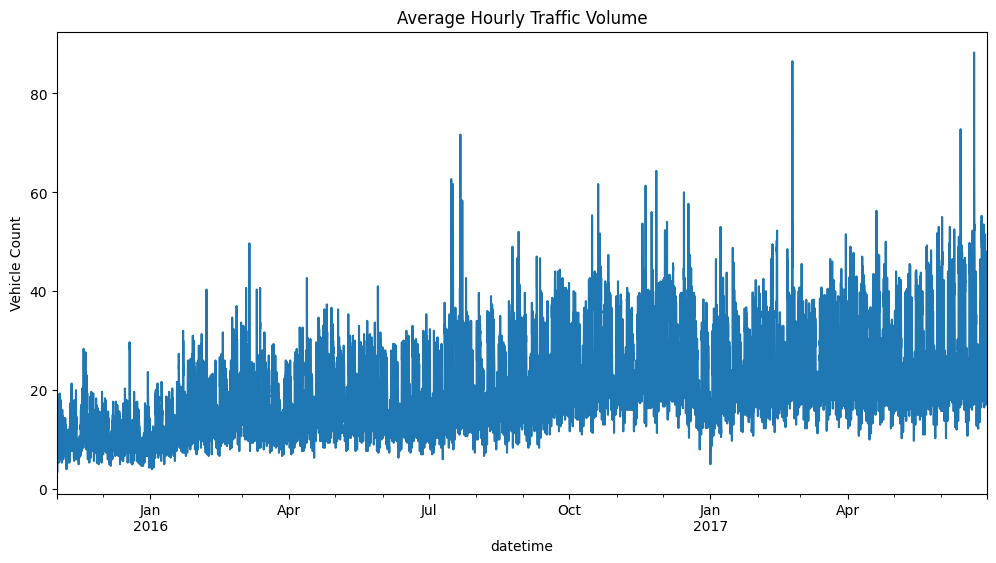

Mean Absolute Error: 3.29
Root Mean Squared Error: 5.00


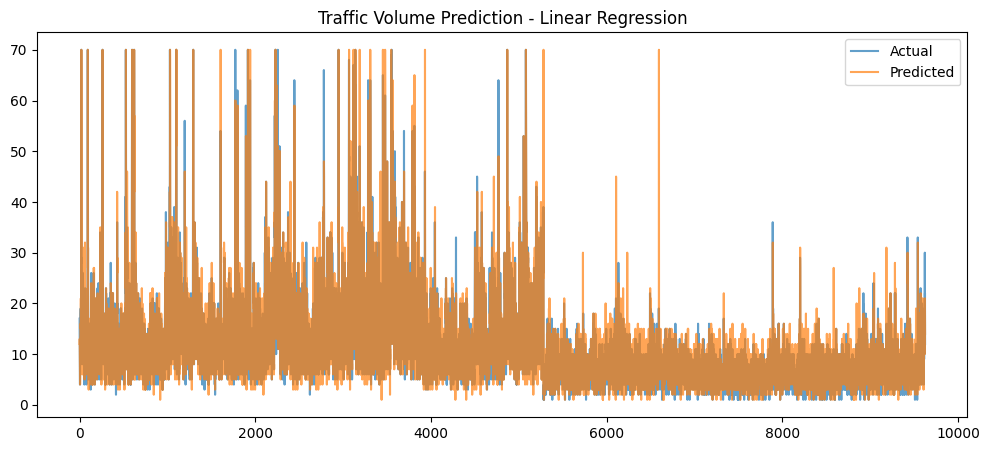

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import joblib


data = pd.read_csv('traffic_dataset.csv', encoding='utf-8-sig')

data.columns = [col.strip().lower() for col in data.columns]
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M', errors='coerce')
data.set_index('datetime', inplace=True)

datetime_candidates = ['datetime', 'date_time', 'timestamp', 'date']

for candidate in datetime_candidates:
    if candidate in data.columns:
        data.set_index(candidate, inplace=True)
        print(f"Using '{candidate}' as the datetime index.")
        break
data['vehicles'].resample('H').mean().plot(figsize=(12,6))
plt.title('Average Hourly Traffic Volume')
plt.ylabel('Vehicle Count')
plt.show()

data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek

features = ['hour', 'day_of_week','lag1','lag2']  # can add weather, holiday flags etc.

cap_value = data['vehicles'].quantile(0.95)
data['vehicle_count_capped'] = np.where(data['vehicles'] > cap_value, cap_value, data['vehicles'])
target = 'vehicle_count_capped'


X = data[features]
y = data[target]

split_point = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

joblib.dump(model,'traffic_model.pkl')

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Traffic Volume Prediction - Linear Regression")
plt.show()